# Quantum Support Vector Machines

In this notebook, we will use quantum circuits to compute a kernel that we will later use in a classical SVM. We will use Qiskit's implementation, that already encapsulates the kernel matrix computation and the SVM training.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.ml.datasets import breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM

We will start with a very simple example that is clearly linearly separable.

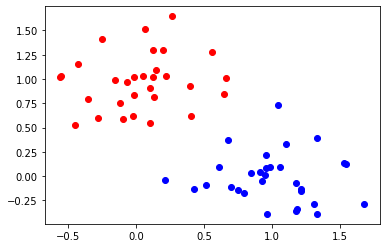

In [2]:
np.random.seed(2020)
n = 30

# Training examples for class 0

mean = [0, 1]
cov = [[0.1, 0], [0, 0.1]]

A = (np.random.multivariate_normal(mean, cov, n))
x_A, y_A = A.T
plt.plot(x_A, y_A, 'ro');

# Training examples for class 1

mean = [1, 0]
cov = [[0.1, 0], [0, 0.1]]

B = (np.random.multivariate_normal(mean, cov, n))
x_B, y_B = B.T
plt.plot(x_B, y_B, 'bo');

To encode the data, we will use the ZZFeatureMap in dimension 2 with linear entaglement.

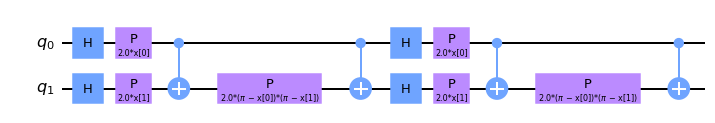

In [3]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
feature_map.draw()

After we have generated the training data and defined the feature map, we can now train the QSVM. 

In [4]:
training_input = np.append(A,B,axis =0)
training_labels = np.array([0]*n+[1]*n) # Training labels are 0 and 1 

backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
qsvm = QSVM(feature_map, quantum_instance = quantum_instance)

qsvm.train(training_input,training_labels)

To test the performance, we are going to generate test data according to the same distributions used for training.

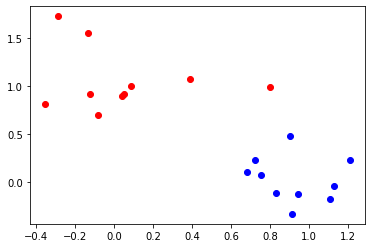

In [5]:
n = 10

# Test examples for class 0

mean = [0, 1]
cov = [[0.1, 0], [0, 0.1]]

C = (np.random.multivariate_normal(mean, cov, n))
x_C, y_C = C.T
plt.plot(x_C, y_C, 'ro');

# Test examples for class 1

mean = [1, 0]
cov = [[0.05, 0], [0, 0.05]]

D = (np.random.multivariate_normal(mean, cov, n))
x_D, y_D = D.T
plt.plot(x_D, y_D, 'bo');


We now use the trained QSVM to predict the class of the test examples. We can also compute the accuracy directly if we provide the labels. 

In [6]:
print("Prediction for examples in test class 0",qsvm.predict(C))
print("Prediction for examples in test class 1",qsvm.predict(D))

test_input = np.append(C,D,axis =0)
test_labels = np.array([0]*n+[1]*n)

print("Accuracy",qsvm.test(test_input,test_labels))

Prediction for examples in test class 0 [0 1 0 0 1 0 0 0 1 0]
Prediction for examples in test class 1 [1 1 1 1 1 1 1 1 1 0]
Accuracy 0.8


We can also use datasets already included in Aqua

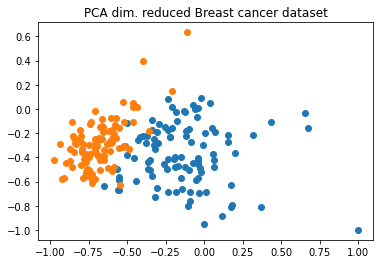

In [7]:
sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=100,
    test_size=10,
    n=2,
    plot_data=True
)

We first use a simple feature map

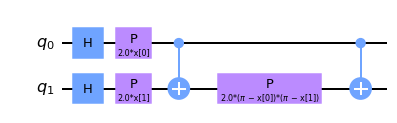

In [8]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear')
feature_map.draw()

In [9]:
qsvm = QSVM(feature_map, training_input, test_input)
result = qsvm.run(quantum_instance)

print("Accuracy: ", result['testing_accuracy'])

Accuracy:  0.8


We now use a more sophisticated feature map

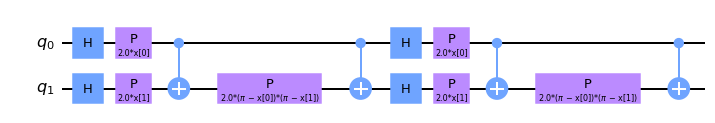

In [10]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
feature_map.draw()

In [11]:
qsvm = QSVM(feature_map, training_input, test_input)
result = qsvm.run(quantum_instance)

print("Accuracy: ", result['testing_accuracy'])

Accuracy:  0.85
